## Headers

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import random
from sklearn.model_selection import train_test_split

## Data preprocessing

In [22]:
df = pd.read_csv('ml-latest-small/ratings.csv')

df = df[df['rating'] > 2]

user_counts = df.groupby('userId')['movieId'].count()
valid_users = user_counts[user_counts > 10].index
df = df[df['userId'].isin(valid_users)]

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

train_set = {}
test_set = {}

for user, group in train_data.groupby('userId'):
    train_set[user] = list(group['movieId'])

for user, group in test_data.groupby('userId'):
    test_set[user] = list(group['movieId'])

movies_train = [movie for user in train_set for movie in train_set[user]]
movies_train_unique = list(set(movies_train))


In [28]:
train_data

,userId,movieId,rating,timestamp
27339,186,902,5.0,1031072545
29966,207,1347,4.0,1258547990
93732,599,3793,3.5,1498500859
36514,249,1884,4.0,1356277600
91630,594,2808,5.0,1108975510
...,...,...,...,...
7507,51,1298,5.0,1230930504
63082,414,2302,5.0,961438373
88648,572,2476,4.0,946487152
989,7,8949,4.0,1110757890


In [32]:
len(movies_train_unique)

8175

## Functions Implemented

In [38]:
def support(movies):
    matching_users = [user for user in train_set if all(movie in train_set[user] for movie in movies)]
    return len(matching_users) / len(train_set)\
    
def generate_frequent_itemsets(itemset_size, minsup,item_sets):
    frequent_itemsets = []

    if itemset_size == 2:
        candidates = [(x, y) for x in l1_movies for y in l1_movies if x < y]
    else:
        candidates = []
        candidate=[]
        for i in range(len(item_sets)):
            for j in range(i + 1, len(item_sets)):
                if sorted(item_sets[i][:-1]) == sorted(item_sets[j][:-1]):
                    candidate = list(item_sets[i][:-1])
                    candidate.append( item_sets[i][-1])
                    candidate.append(item_sets[j][-1])
                    candidates.append(candidate)
    for candidate in candidates:
        sup = support(candidate)
        if sup >= minsup:
            frequent_itemsets.append(candidate)

    return frequent_itemsets
def generate_association_rules(item_list, minconf):

    for x in item_list:
        s = support(x)
        for i in range(len(x)):
            antecedent = [x[j] for j in range(len(x)) if j != i]
            conf = s / support(antecedent)
            if conf >= minconf:
                ass_rules.append([antecedent, [x[i]], s, conf])
    
    return ass_rules

### Part-1


In [39]:
minsup = 0.09
minconf = 0.1

asr_movies_sup = {movie: support([movie]) for movie in movies_train_unique if support([movie]) >= minsup}

movies_stminsup = list(asr_movies_sup.keys())

l1_movies = movies_stminsup

l2_movies = generate_frequent_itemsets(2, minsup,l1_movies)
l3_movies = generate_frequent_itemsets(3, minsup,l2_movies)
l4_movies = generate_frequent_itemsets(4, minsup,l3_movies)

ass_rules = []


# generate_association_rules(l2_movies, minconf)
# generate_association_rules(l3_movies, minconf)
generate_association_rules(l4_movies, minconf)



[[[356, 1196, 1210], [260], 0.09225700164744646, 0.8615384615384616],
 [[260, 1196, 1210], [356], 0.09225700164744646, 0.6829268292682927],
 [[260, 356, 1210], [1196], 0.09225700164744646, 0.7887323943661972],
 [[260, 356, 1196], [1210], 0.09225700164744646, 0.767123287671233],
 [[1196, 1210, 2571], [260], 0.10214168039538715, 0.8378378378378378],
 [[260, 1210, 2571], [1196], 0.10214168039538715, 0.7654320987654322],
 [[260, 1196, 2571], [1210], 0.10214168039538715, 0.7294117647058824],
 [[260, 1196, 1210], [2571], 0.10214168039538715, 0.7560975609756098]]

In [44]:
# New code

def support(movies):
    matching_users = [user for user in train_set if all(movie in train_set[user] for movie in movies)]
    return len(matching_users) / len(train_set)

def generate_frequent_itemsets(itemset_size, minsup, item_sets):
    frequent_itemsets = []

    if itemset_size == 2:
        candidates = [(x, y) for x in l1_movies for y in l1_movies if x < y]
    else:
        candidates = []
        for i in range(len(item_sets)):
            for j in range(i + 1, len(item_sets)):
                if sorted(item_sets[i][:-1]) == sorted(item_sets[j][:-1]):
                    candidate = list(item_sets[i][:-1])
                    candidate.append(item_sets[i][-1])
                    candidate.append(item_sets[j][-1])
                    candidates.append(candidate)
    for candidate in candidates:
        sup = support(candidate)
        if sup >= minsup:
            frequent_itemsets.append(candidate)

    return frequent_itemsets

def generate_association_rules(item_list, minconf):
    ass_rules = []

    for x in item_list:
        s = support(x)
        for i in range(len(x)):
            antecedent = [x[i]]
            consequent = [x[j] for j in range(len(x)) if j != i]
            conf = s / support(antecedent)
            if conf >= minconf:
                ass_rules.append([antecedent, consequent, s, conf])
    
    return ass_rules

# Usage remains the same
minsup = 0.09
minconf = 0.1

asr_movies_sup = {movie: support([movie]) for movie in movies_train_unique if support([movie]) >= minsup}
movies_stminsup = list(asr_movies_sup.keys())
l1_movies = movies_stminsup
l2_movies = generate_frequent_itemsets(2, minsup, l1_movies)
l3_movies = generate_frequent_itemsets(3, minsup, l2_movies)
l4_movies = generate_frequent_itemsets(4, minsup, l3_movies)

ass_rules = []
generate_association_rules(l2_movies, minconf)
generate_association_rules(l3_movies, minconf)
generate_association_rules(l4_movies, minconf)

# Uncomment the next line if you want to include 4-item sets
ass_rules.extend(generate_association_rules(l2_movies, minconf))
ass_rules.extend(generate_association_rules(l3_movies, minconf))
ass_rules.extend(generate_association_rules(l4_movies, minconf))

# Print the first few rules to verify the format
# for rule in ass_rules[:5]:
#     print(f"Rule: {rule[0]} → {rule[1]}, Support: {rule[2]}, Confidence: {rule[3]}")

### Part-2

In [45]:
sup_rules=sorted(ass_rules, key=lambda x: x[2], reverse=True)
conf_rules=sorted(ass_rules, key=lambda x: x[3], reverse=True)

top_100_sup_rules=sup_rules[:100]
top_100_conf_rules=conf_rules[:100]

common_sup_conf_rules=[]
for x in top_100_conf_rules:
  if x in top_100_sup_rules:
    common_sup_conf_rules.append(x)
print(common_sup_conf_rules)

[[[7153], [4993], 0.18616144975288304, 0.7635135135135136], [[5952], [4993], 0.15980230642504117, 0.7519379844961239], [[1210], [260], 0.18616144975288304, 0.7337662337662338], [[1196], [260], 0.19604612850082373, 0.7300613496932515], [[4993], [7153], 0.18616144975288304, 0.7290322580645161], [[47], [296], 0.17957166392092258, 0.6855345911949685], [[2959], [2571], 0.18616144975288304, 0.6726190476190477], [[1210], [2571], 0.1696869851729819, 0.6688311688311689], [[1196], [2571], 0.17957166392092258, 0.6687116564417178], [[2028], [2571], 0.15980230642504117, 0.6643835616438356]]


### Part-3

[0.0004347428153029471, 0.0004706989879971758, 0.00042220989626882353, 0.00040861860965896564, 0.0004037858965662047, 0.0004002271056134179, 0.0003975181751866696, 0.0003943551924047927, 0.0003817253988025877, 0.00036712758146221667]
[0.00012934496984219913, 0.00027230519966778765, 0.00034718912957642926, 0.0004288806894767656, 0.0005105722493771019, 0.0005854561792857434, 0.000660340109194385, 0.000728416409111332, 0.0007760698190531948, 0.0008101079690116683]


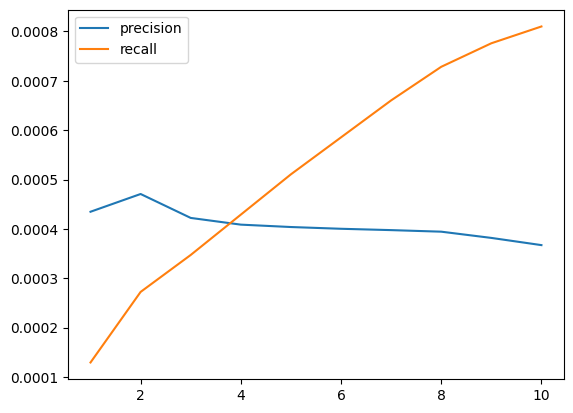

In [6]:
precision_avgs=[]
recall_avgs=[]
for k in range(1,11):
  for user in  train_set:
    train = train_set[user]
    if user in test_set:
        test = test_set[user]
        recall_sum=0
        precision_sum=0
        recommendation=[]
        for x in train:
          y=[]
          count=0
          for asr in conf_rules:
            if(int(asr[0][0])==int(x)):
              y = y+ asr[1]
              count+=1
              if(count==k):
                break
          recommendation = recommendation + y
        hitset = []
        for m in recommendation:
          if m in test:
            hitset.append(m)
        recall = len(hitset)/len(test)
        if(len(recommendation)==0):
          precision=0
        else:
          precision = len(hitset)/len(recommendation)
        recall_sum+=recall
        precision_sum+=precision
  recall_avg = recall_sum / len(train_set)
  precision_avg = precision_sum / len(train_set)
  precision_avgs.append(precision_avg)
  recall_avgs.append(recall_avg)

print(precision_avgs)
print(recall_avgs)

x=[i for i in range(1,11)]
plt.plot(x,precision_avgs,label='precision')
plt.plot(x,recall_avgs, label='recall')
plt.legend()


Decreasing Precision: On increasing the number of rules (k), the average precision is likely to decrease. This is because with more rules, we are recommending a larger set of items, and some of those recommendations may not be relevant to the user. As a result, the precision, which measures how many of the recommended items are relevant, tends to decrease as k increases.

Increasing Recall: On the other handOn increasing the number of rules (e) N, the average recall is likely to increase. This is because with more rulesweou are recommending a larger set of items, which is more likely to include some of the relevant items from the test set. Recall measures how many of the relevant items are included in the recommendations, and aweou provide more recommendationsweou are more likely to cover a larger portion of the relevant items.

Trade-off Between Precision and Recall: The graph will likely show a trade-off between precision and recall. Wwe you have fewer rules (loker we you have a higher precision but a lower recall, and wwe you have more rules (higker we you have a higher recall but a lower precisces.

Precision averages: [0.10614161663248987, 0.1024417030111868, 0.10161598791075481, 0.0984233451247939, 0.09290571763581432, 0.08979761522082323, 0.0875889907175898, 0.08566722592217874, 0.08329257377014719, 0.0814730026705825]
Recall averages: [0.05257937822013198, 0.07094473608417161, 0.09367947462319738, 0.10132954590141019, 0.10833465318204605, 0.12134139560224162, 0.13175547725326248, 0.13867196749953928, 0.1436657317352434, 0.14935456617953882]


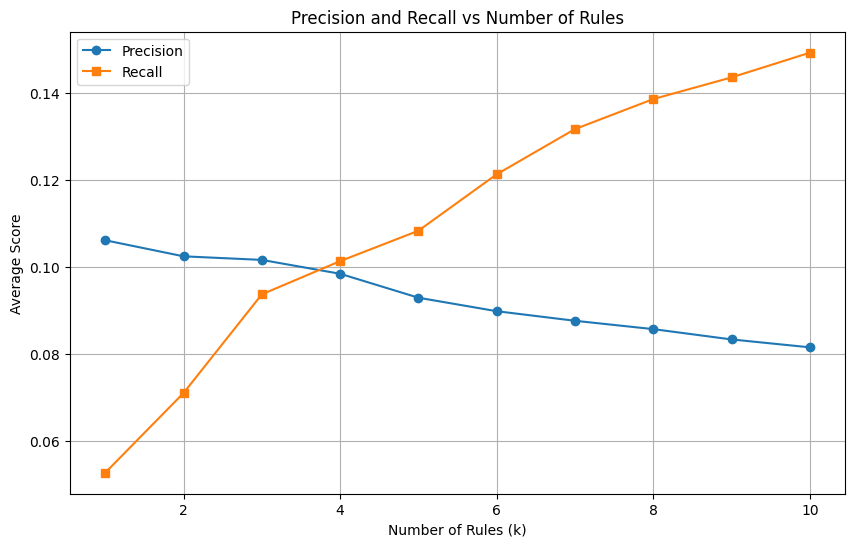

In [46]:
# New code

precision_avgs = []
recall_avgs = []

for k in range(1, 11):
    recall_sum = 0
    precision_sum = 0
    user_count = 0

    for user in train_set:
        if user in test_set:
            user_count += 1
            train = train_set[user]
            test = test_set[user]
            recommendation = set()

            for x in train:
                count = 0
                for rule in conf_rules:
                    if int(rule[0][0]) == int(x):  # X is a single item
                        recommendation.update(rule[1])  # Y is an itemset
                        count += 1
                        if count == k:
                            break

            hitset = recommendation.intersection(test)
            recall = len(hitset) / len(test) if test else 0
            precision = len(hitset) / len(recommendation) if recommendation else 0

            recall_sum += recall
            precision_sum += precision

    recall_avg = recall_sum / user_count if user_count > 0 else 0
    precision_avg = precision_sum / user_count if user_count > 0 else 0
    precision_avgs.append(precision_avg)
    recall_avgs.append(recall_avg)

print("Precision averages:", precision_avgs)
print("Recall averages:", recall_avgs)

x = list(range(1, 11))
plt.figure(figsize=(10, 6))
plt.plot(x, precision_avgs, label='Precision', marker='o')
plt.plot(x, recall_avgs, label='Recall', marker='s')
plt.xlabel('Number of Rules (k)')
plt.ylabel('Average Score')
plt.title('Precision and Recall vs Number of Rules')
plt.legend()
plt.grid(True)
plt.show()

### Part-4

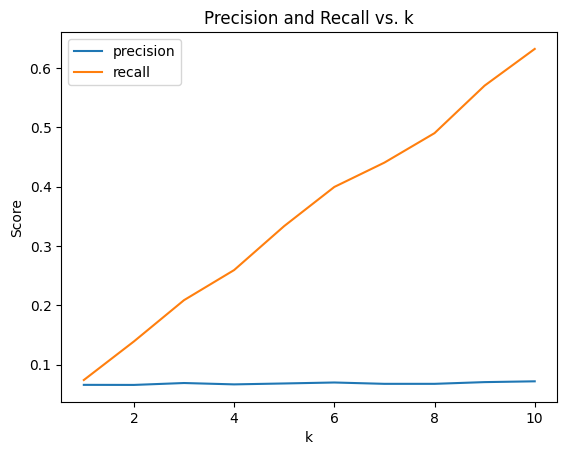

In [7]:
import random
import matplotlib.pyplot as plt
sample_size = 20 
sample_users = random.sample(list(test_set.keys()), sample_size)

precision_avgs = []
recall_avgs = []

for k in range(1, 11):
    recall_sum = 0
    precision_sum = 0

    for user in sample_users:
        train = train_set[user]
        if user in test_set:
            test = test_set[user]
            recommendation = []
    
            for x in train:
                y = []
                count = 0
                for asr in conf_rules:
                    if int(asr[0][0]) == int(x):
                        y = y + asr[1]
                        count += 1
                        if count == k:
                            break
                recommendation = recommendation + y
    
            hit_set = [m for m in recommendation if m in test]
    
            recall = len(hit_set) / len(test)
            precision = len(hit_set) / len(recommendation) if len(recommendation) > 0 else 0

            recall_sum += recall
            precision_sum += precision

    recall_avg = recall_sum / sample_size
    precision_avg = precision_sum / sample_size

    precision_avgs.append(precision_avg)
    recall_avgs.append(recall_avg)

x = [i for i in range(1, 11)]
plt.plot(x, precision_avgs, label='precision')
plt.plot(x, recall_avgs, label='recall')
plt.legend()
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Precision and Recall vs. k')
plt.show()

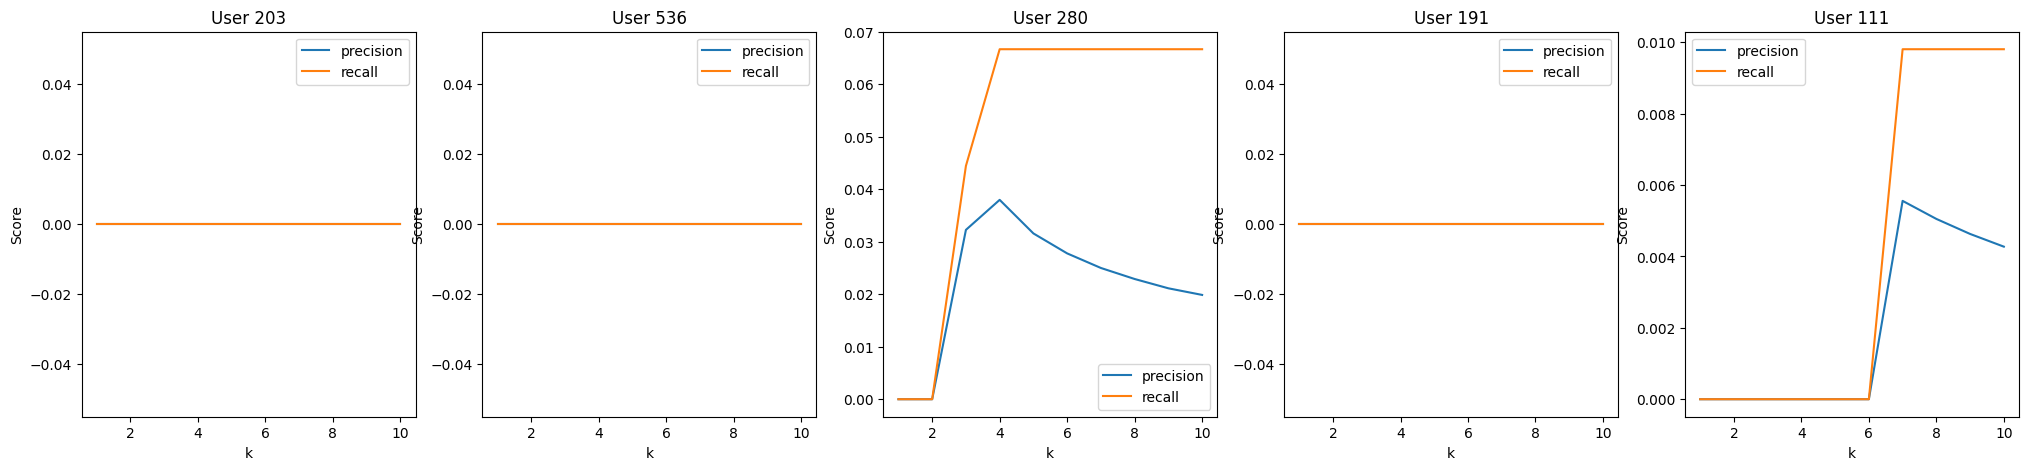

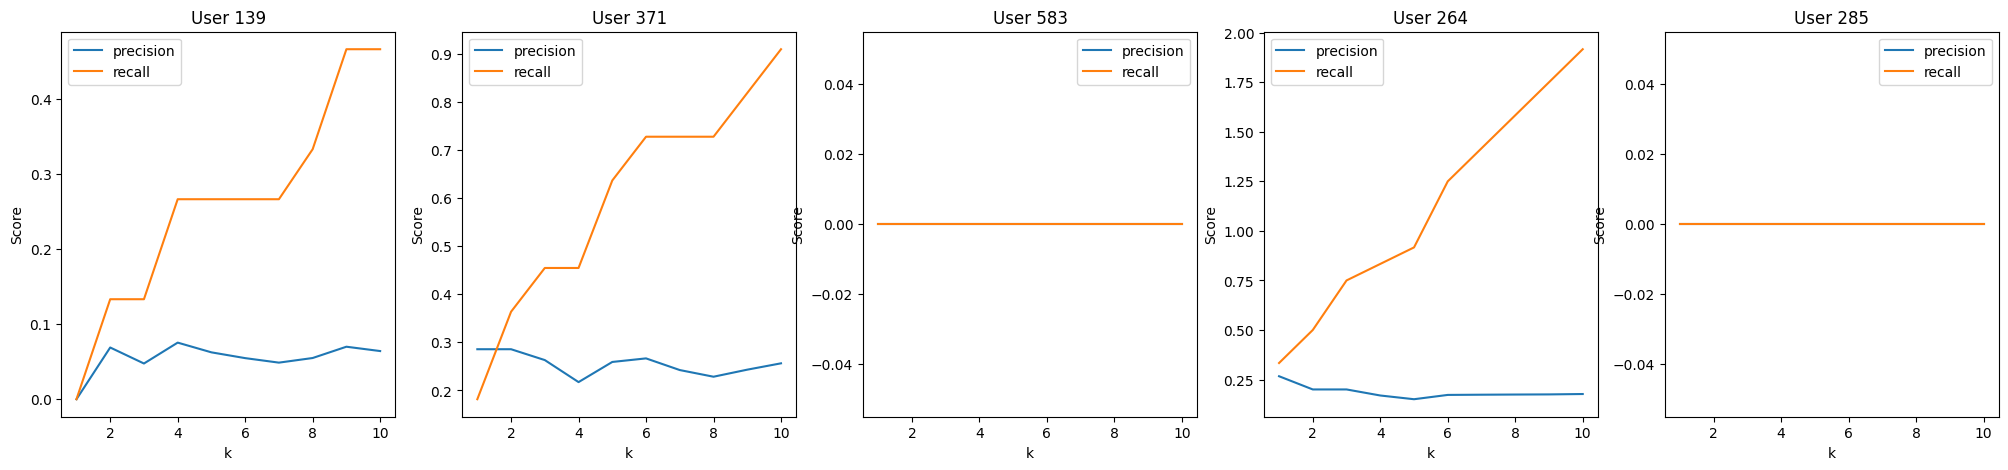

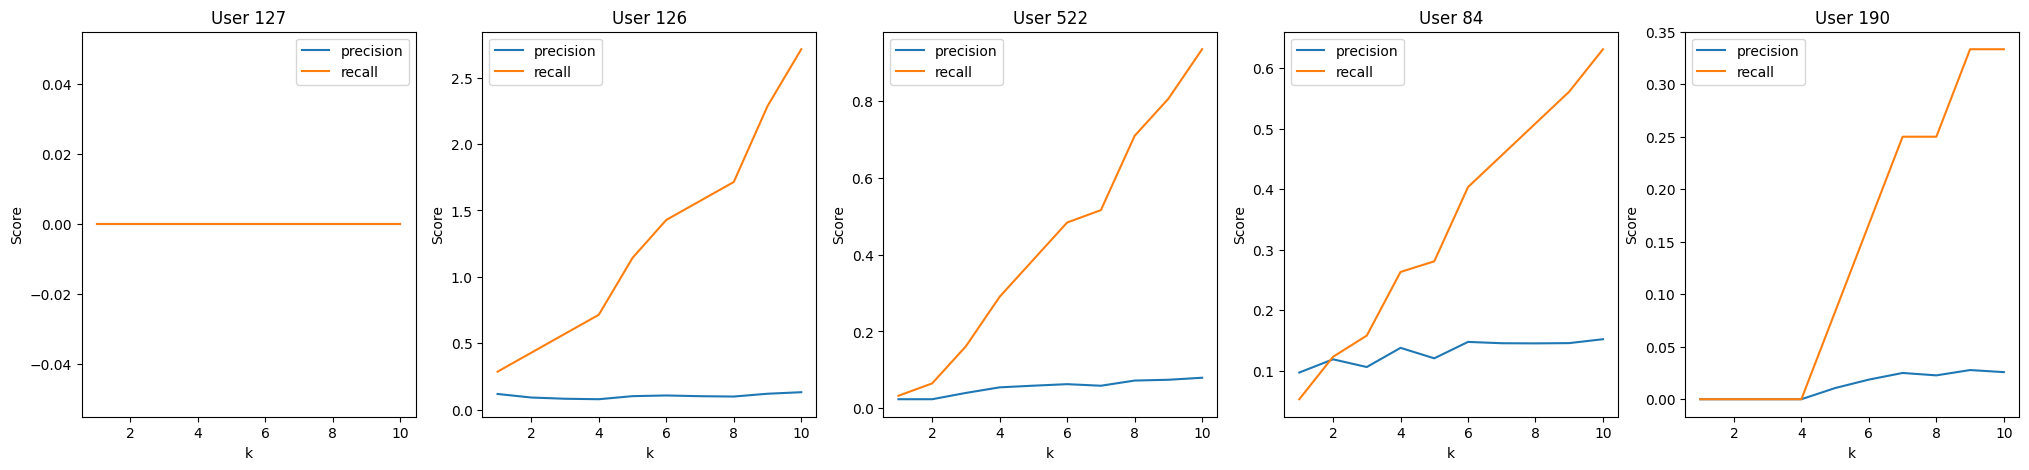

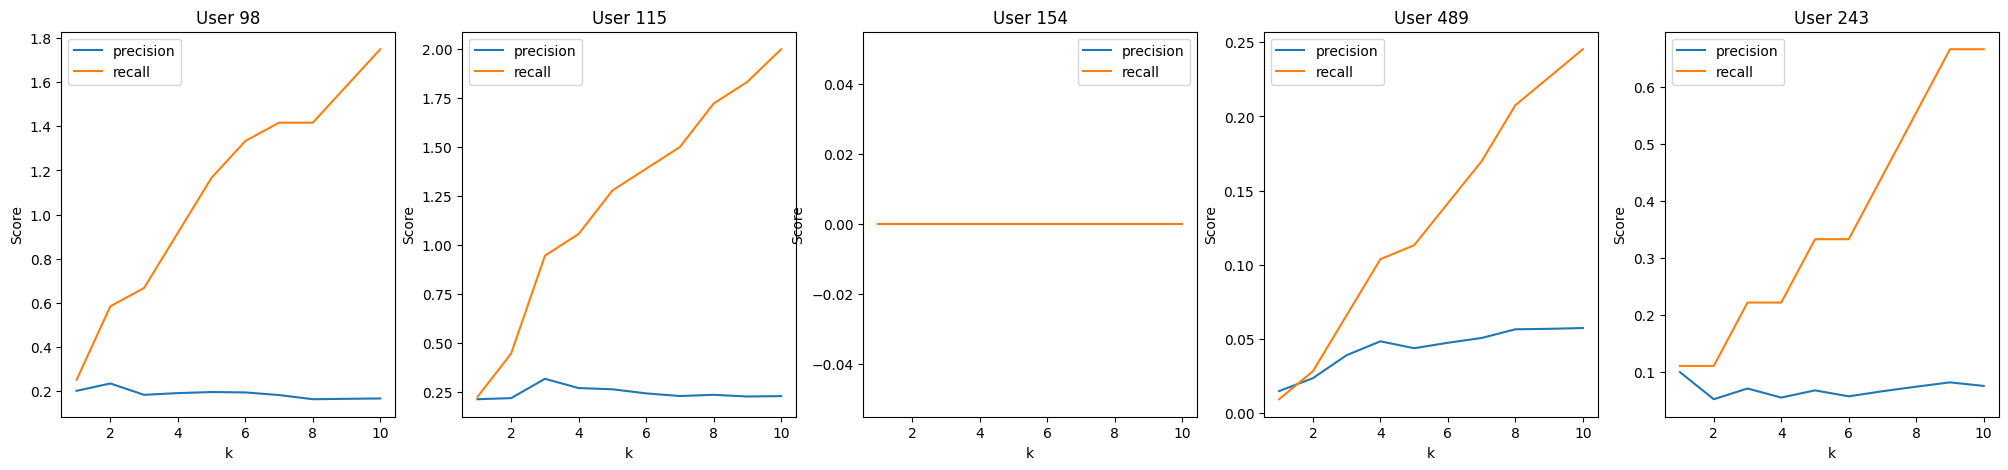

In [8]:
users_per_row = 5
num_rows = (sample_size + users_per_row - 1) // users_per_row

for row in range(num_rows):
    plt.figure(figsize=(25, 5))

    for col in range(users_per_row):
        index = row * users_per_row + col
        if index >= sample_size:
            break

        user = sample_users[index]
        precision_avgs = []
        recall_avgs = []

        for k in range(1, 11):
            train = train_set[user]
            if user in test_set:
                test = test_set[user]
                recall_sum = 0
                precision_sum = 0
                recommendation = []
    
                for x in train:
                    y = []
                    count = 0
                    for asr in conf_rules:
                        if int(asr[0][0]) == int(x):
                            y = y + asr[1]
                            count += 1
                            if count == k:
                                break
                    recommendation = recommendation + y
    
                hit_set = [m for m in recommendation if m in test]
    
                recall = len(hit_set) / len(test)
                precision = len(hit_set) / len(recommendation) if len(recommendation) > 0 else 0
    
                recall_sum += recall
                precision_sum += precision
    
            recall_avg = recall_sum
            precision_avg = precision_sum

            precision_avgs.append(precision_avg)
            recall_avgs.append(recall_avg)

        x = [i for i in range(1, 11)]
        plt.subplot(1, users_per_row, col + 1)
        plt.plot(x, precision_avgs, label='precision')
        plt.plot(x, recall_avgs, label='recall')
        plt.xlabel('k')
        plt.ylabel('Score')
        plt.title(f'User {user}')
        plt.legend()

    plt.show()
